<a href="https://colab.research.google.com/github/dajebbar/predicting-housing-prices/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction with Linear Regression

In [ ]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

We'll use the `urlretrieve` function from the module `urllib.request` to dowload the dataset.

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(dataset_url, 'house-prices.zip')

('house-prices.zip', <http.client.HTTPMessage at 0x7f0745ab5e90>)

The file `housing-prices.zip` has been downloaded. Let's unzip it using the `zipfile` module.

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')

The dataset is extracted to the folder house-prices. Let's view the contents of the folder using the os module.

In [ ]:
import os

In [ ]:
data_dir = 'house-prices'

In [ ]:
os.listdir(data_dir)

['train.csv', 'data_description.txt', 'test.csv', 'sample_submission.csv']

In [ ]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [ ]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house-prices/train.csv'

> QUESTION 1: Load the data from the file `train.csv` into a Pandas data frame.

In [ ]:
prices_df = pd.read_csv(train_csv_path)

In [ ]:
prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's explore the columns and data types within the dataset.

In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> QUESTION 2: How many rows and columns does the dataset contain?

In [ ]:
n_rows = prices_df.shape[0]

In [ ]:
n_cols = prices_df.shape[1]

In [ ]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 81 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relationship with the price of the house (using scatter plot and correlations). Create some graphs and summarize your insights using the empty cells below.

**Missing values**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

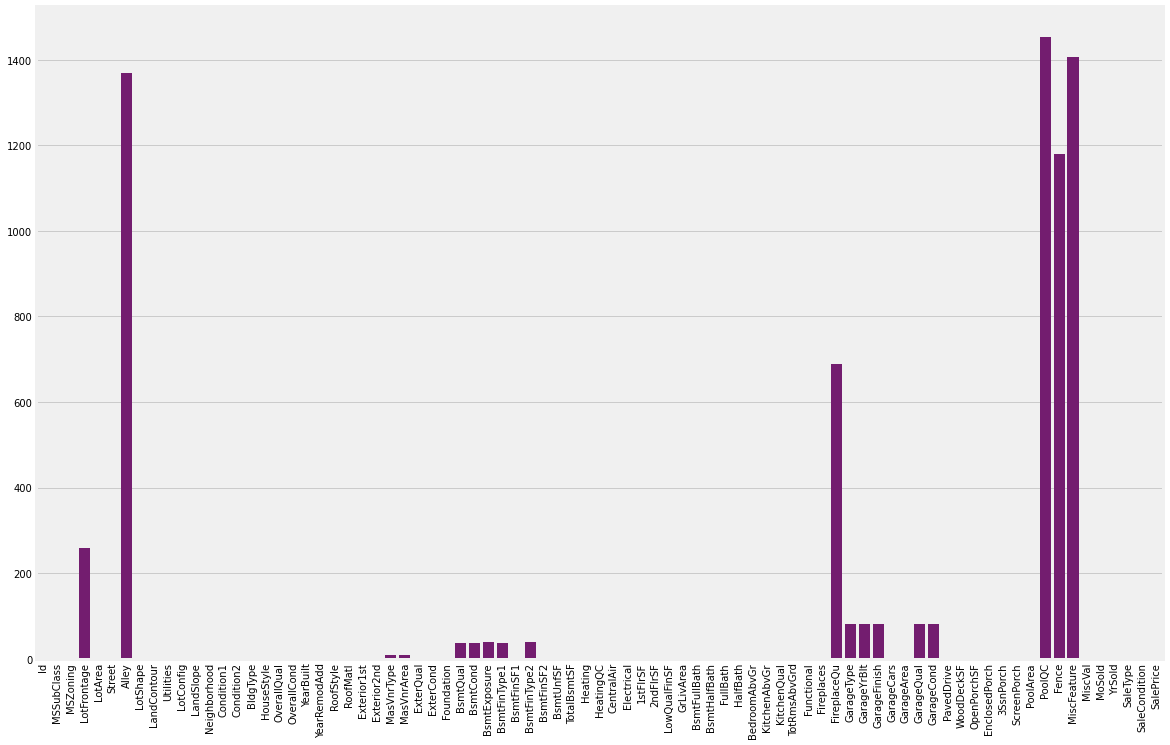

In [ ]:
plt.figure(figsize=[18,12])
base_color = sns.color_palette()[5]
na_cnt = prices_df.isna().sum()
sns.barplot(na_cnt.index.values, na_cnt, color=base_color);
plt.xticks(rotation=90)

In [ ]:
null_val = prices_df.isnull().sum().sort_values(ascending=False)
percent = (prices_df.isnull().sum()/prices_df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([null_val, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


At first glance, we can see that variables such as `LotFrontage`, `Alley`, `FireplaceQu` or `PoolQC` contain a lot of missing values. Maybe it is because the variables are not very significant when buying a house.  
In general, any variable containing more than 15% of missing values will be deleted and will not be taken into account.

**`SalePrice` distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



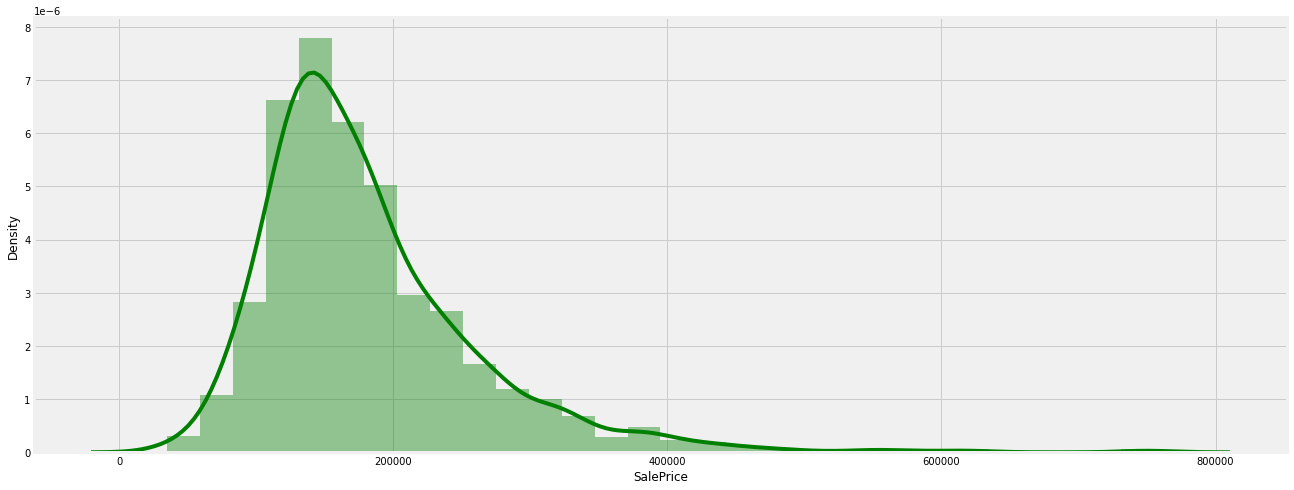

In [ ]:
plt.figure(figsize=(20, 8))
sns.distplot(prices_df['SalePrice'], color='g', bins=30, hist_kws={'alpha': 0.4});

We see that our target variable `SalePrice` does not represent a normal distribution, on the contrary it is largely positive skewness.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0732cc1a10>,
      dtype=object)

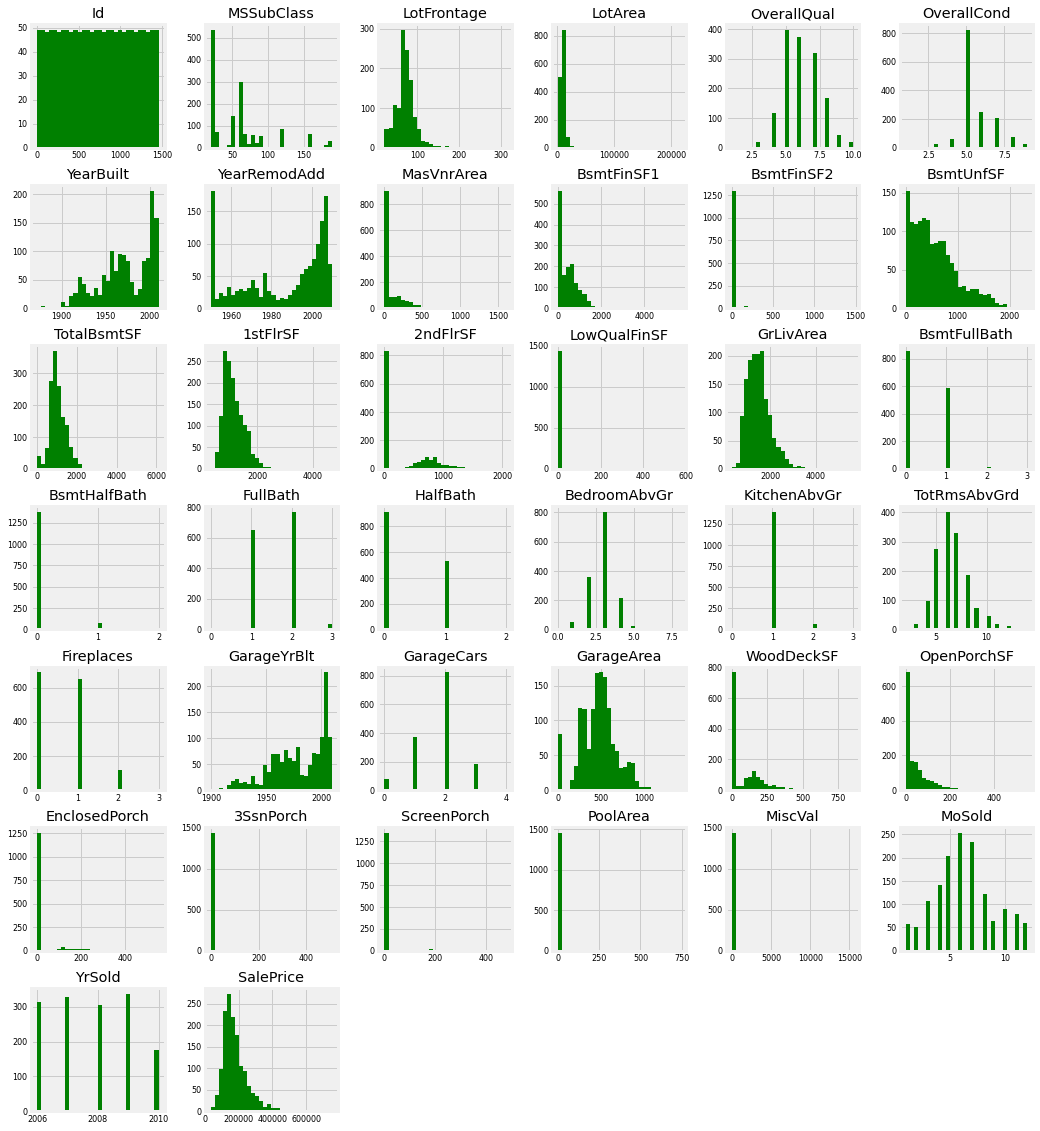

In [ ]:
numerical_features = prices_df.select_dtypes(include = ['float64', 'int64'])
numerical_features.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

**Correlation Analysis**

In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

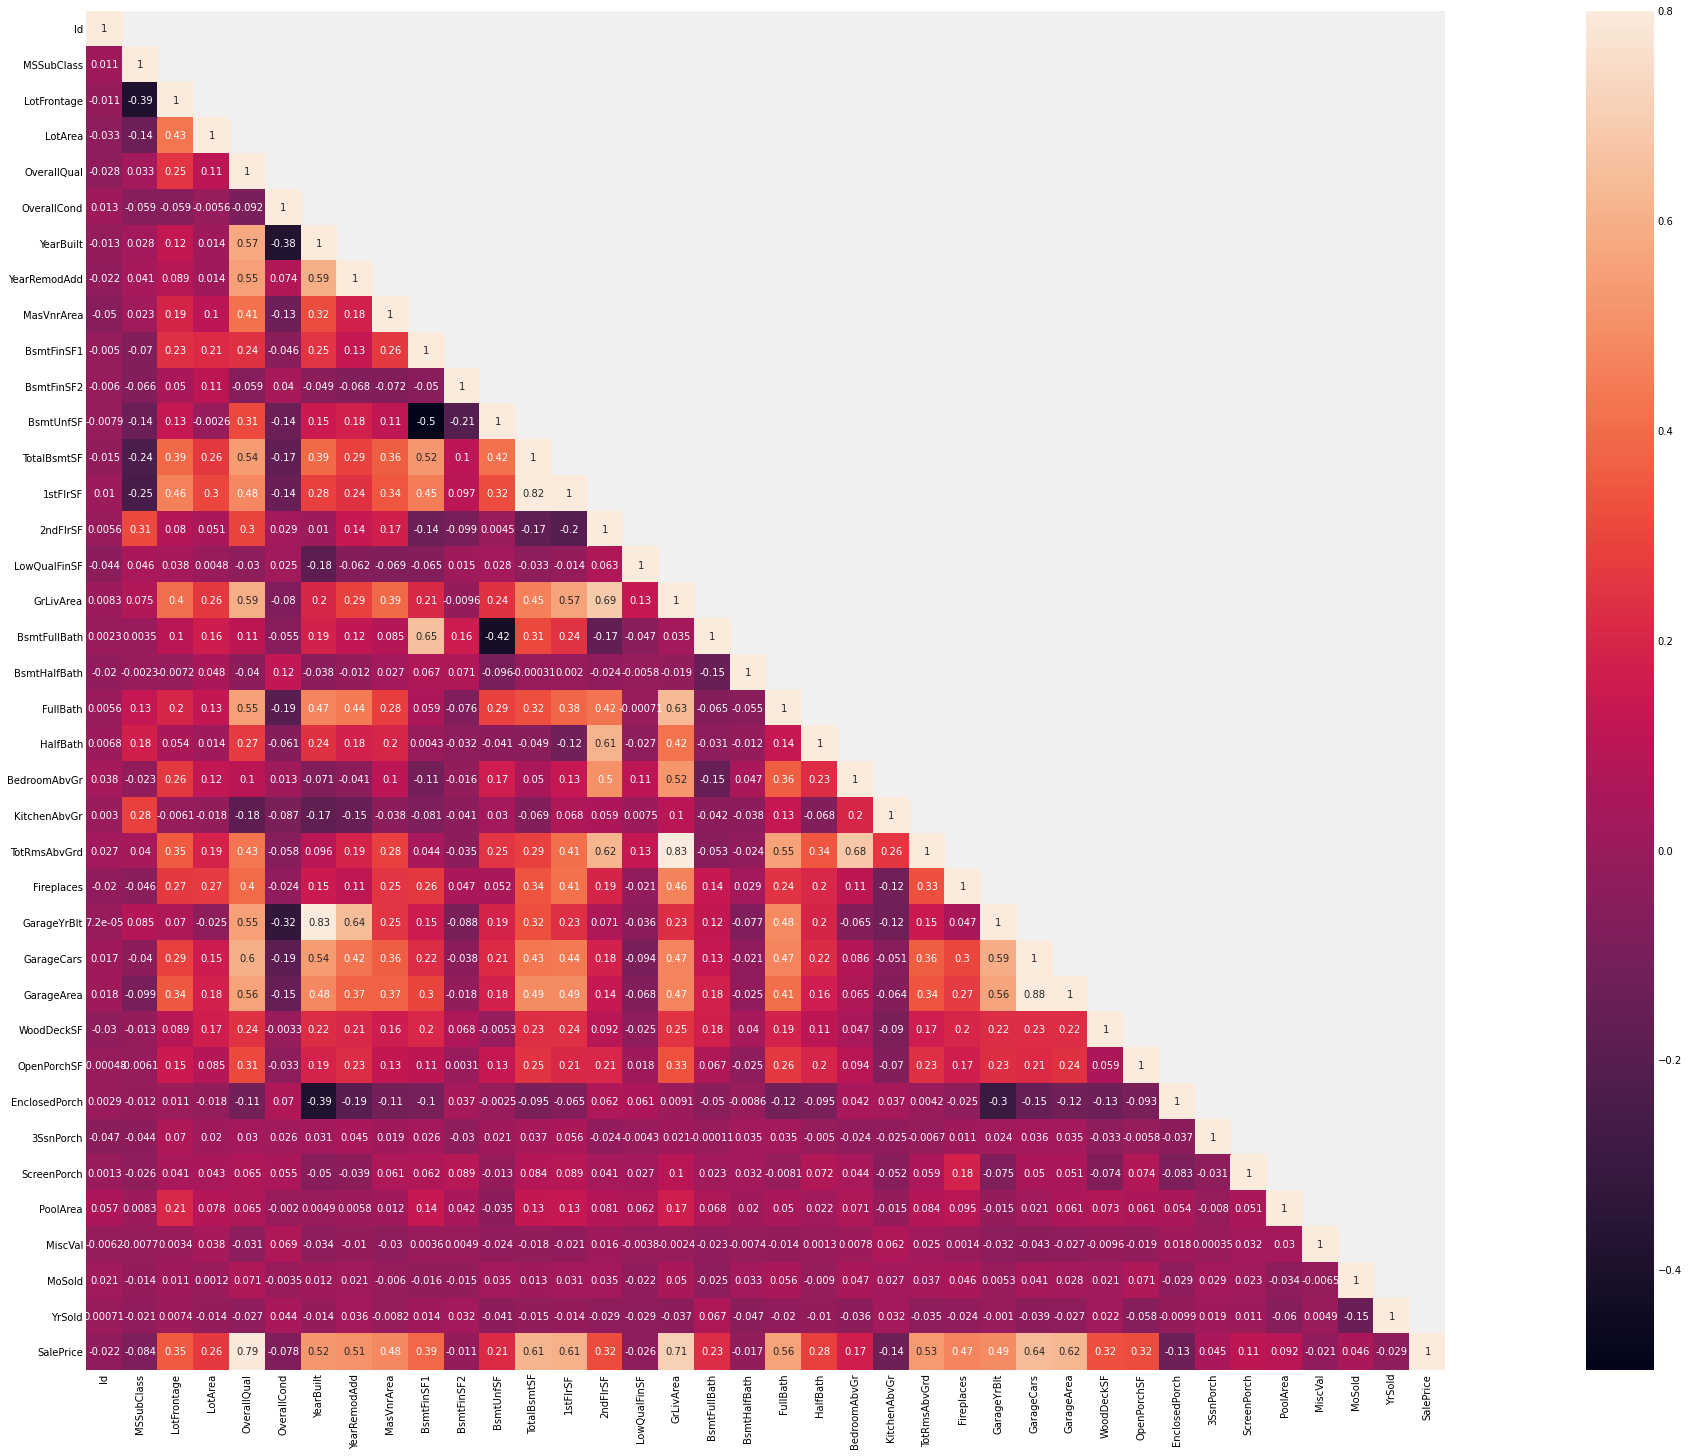

In [ ]:
corr_mat = prices_df.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(45,25)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)

The correlation matrix shows us that there is a multicollinearity between different features such as:
- 82% correlation between TotalBsmtSF is 1stFlrSF.
- 83% correlation between GarageYrBlt and YearBuilt.
- 83% correlation between TotRmsAbvGrd and GrLivArea.
- 89% correlation between GarageCars and GarageArea.  

So since we will be dealing with a multiple linear regression, we will choose a single variable for each feature.

We can also see that the most variables correlated to SalePrice are: GrLivArea, OverallQual, TotalBsmtSF, GarageCars, FullBath, YearBuilt.

**Scatteplot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



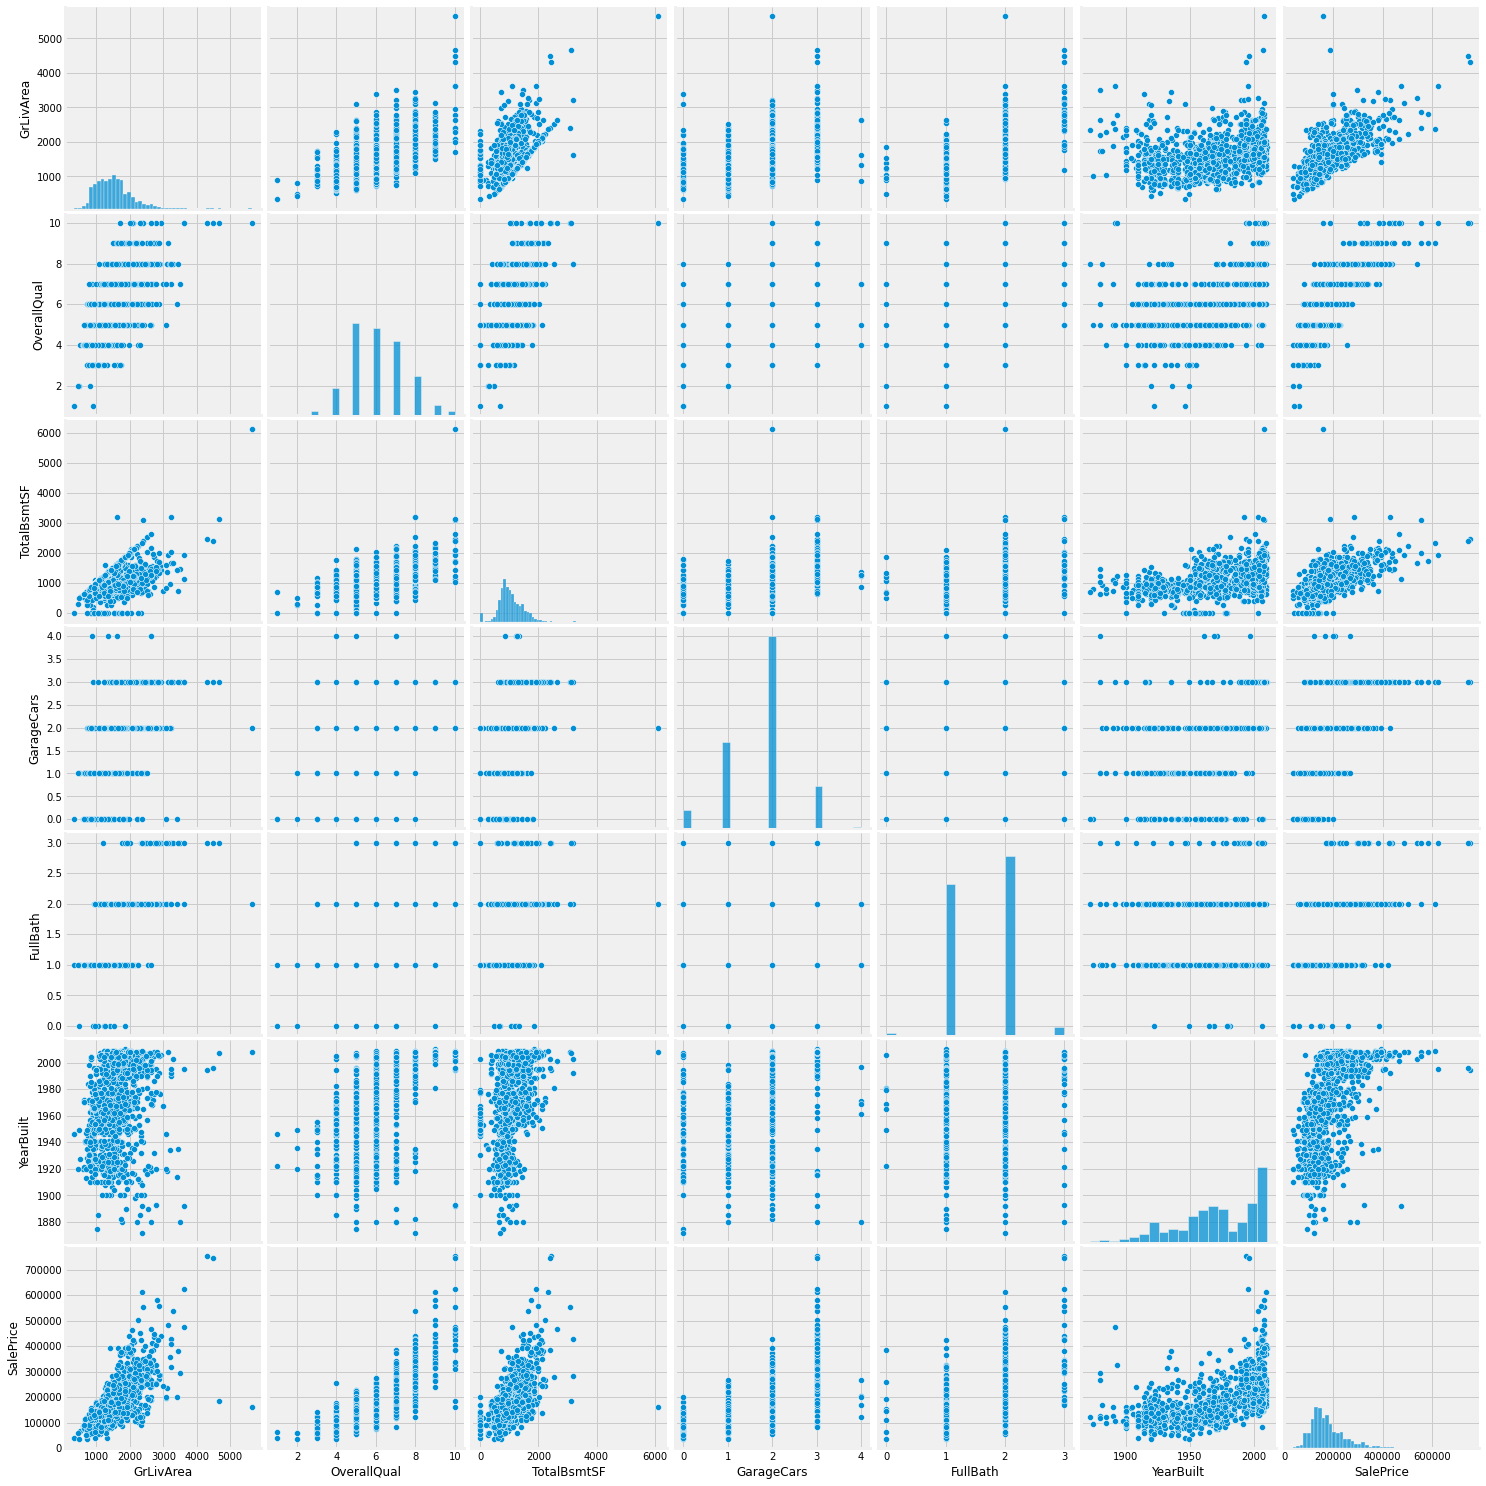

In [ ]:
features_col = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'SalePrice']
sns.pairplot(prices_df[features_col], size=3)

The graph shows some interesting things, especially between SalePrice and GrLiveArea, OverallQual and TotalBsmtSF.

In [ ]:
px.scatter(prices_df, x='GrLivArea', y='SalePrice')

We see that there is a linear trend with a positive correlation. Also note the existence of outliers

## Step 2 - Prepare the Dataset for Training

> QUESTION 3: Create a list input_cols of column names containing data that can be used as input to train the model, and identify the target column as the variable target_col.

For the numerical variables, I will choose the most relevant ones, namely those that we have refined thanks to the correlation matrix.

In [ ]:
# features_col = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'SalePrice']
numerical_col = features_col[:-1]
numerical_col

['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'GarageCars',
 'FullBath',
 'YearBuilt']

For categorical variables, I will choose those where the missing values are less than 15%.

In [ ]:
cat_features = prices_df.select_dtypes(include = 'object')
ms_val = missing_values[(missing_values.Percent < 0.15)]
# print(ms_val.index)
# missing_values.index.values

categorical_col = []
for i in ms_val.index:
  if i in cat_features:
    categorical_col.append(i)
print(categorical_col)


['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', 'Utilities', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'LotConfig', 'HouseStyle', 'BldgType', 'Condition2', 'MSZoning', 'Street', 'Condition1', 'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'HeatingQC', 'PavedDrive', 'SaleType', 'Functional', 'KitchenQual', 'CentralAir', 'SaleCondition', 'Heating']


In [ ]:
input_cols = numerical_col + categorical_col

In [ ]:
len(input_cols)

44

In [ ]:
input_cols

['GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'GarageCars',
 'FullBath',
 'YearBuilt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical',
 'Utilities',
 'Foundation',
 'ExterCond',
 'ExterQual',
 'Exterior2nd',
 'Exterior1st',
 'RoofMatl',
 'RoofStyle',
 'LotConfig',
 'HouseStyle',
 'BldgType',
 'Condition2',
 'MSZoning',
 'Street',
 'Condition1',
 'Neighborhood',
 'LotShape',
 'LandContour',
 'LandSlope',
 'HeatingQC',
 'PavedDrive',
 'SaleType',
 'Functional',
 'KitchenQual',
 'CentralAir',
 'SaleCondition',
 'Heating']

In [ ]:
# Identify the name of the target column (a single string, not a list)
target_col = features_col[-1]
target_col

'SalePrice'

In [ ]:
print(list(input_cols))

['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', 'Utilities', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'LotConfig', 'HouseStyle', 'BldgType', 'Condition2', 'MSZoning', 'Street', 'Condition1', 'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'HeatingQC', 'PavedDrive', 'SaleType', 'Functional', 'KitchenQual', 'CentralAir', 'SaleCondition', 'Heating']


In [ ]:
len(input_cols)

44

In [ ]:
print(target_col)

SalePrice


In [ ]:
inputs_df = prices_df[input_cols].copy()

In [ ]:
targets = prices_df[target_col]

In [ ]:
inputs_df

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical,Utilities,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,LotConfig,HouseStyle,BldgType,Condition2,MSZoning,Street,Condition1,Neighborhood,LotShape,LandContour,LandSlope,HeatingQC,PavedDrive,SaleType,Functional,KitchenQual,CentralAir,SaleCondition,Heating
0,1710,7,856,2,2,2003,TA,Attchd,RFn,TA,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr,AllPub,PConc,TA,Gd,VinylSd,VinylSd,CompShg,Gable,Inside,2Story,1Fam,Norm,RL,Pave,Norm,CollgCr,Reg,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
1,1262,6,1262,2,2,1976,TA,Attchd,RFn,TA,Gd,Unf,ALQ,TA,Gd,None,SBrkr,AllPub,CBlock,TA,TA,MetalSd,MetalSd,CompShg,Gable,FR2,1Story,1Fam,Norm,RL,Pave,Feedr,Veenker,Reg,Lvl,Gtl,Ex,Y,WD,Typ,TA,Y,Normal,GasA
2,1786,7,920,2,2,2001,TA,Attchd,RFn,TA,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr,AllPub,PConc,TA,Gd,VinylSd,VinylSd,CompShg,Gable,Inside,2Story,1Fam,Norm,RL,Pave,Norm,CollgCr,IR1,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
3,1717,7,756,3,1,1915,TA,Detchd,Unf,TA,No,Unf,ALQ,Gd,TA,None,SBrkr,AllPub,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg,Gable,Corner,2Story,1Fam,Norm,RL,Pave,Norm,Crawfor,IR1,Lvl,Gtl,Gd,Y,WD,Typ,Gd,Y,Abnorml,GasA
4,2198,8,1145,3,2,2000,TA,Attchd,RFn,TA,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr,AllPub,PConc,TA,Gd,VinylSd,VinylSd,CompShg,Gable,FR2,2Story,1Fam,Norm,RL,Pave,Norm,NoRidge,IR1,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,6,953,2,2,1999,TA,Attchd,RFn,TA,No,Unf,Unf,TA,Gd,None,SBrkr,AllPub,PConc,TA,TA,VinylSd,VinylSd,CompShg,Gable,Inside,2Story,1Fam,Norm,RL,Pave,Norm,Gilbert,Reg,Lvl,Gtl,Ex,Y,WD,Typ,TA,Y,Normal,GasA
1456,2073,6,1542,2,2,1978,TA,Attchd,Unf,TA,No,Rec,ALQ,TA,Gd,Stone,SBrkr,AllPub,CBlock,TA,TA,Plywood,Plywood,CompShg,Gable,Inside,1Story,1Fam,Norm,RL,Pave,Norm,NWAmes,Reg,Lvl,Gtl,TA,Y,WD,Min1,TA,Y,Normal,GasA
1457,2340,7,1152,1,2,1941,TA,Attchd,RFn,TA,No,Unf,GLQ,Gd,TA,None,SBrkr,AllPub,Stone,Gd,Ex,CmentBd,CemntBd,CompShg,Gable,Inside,2Story,1Fam,Norm,RL,Pave,Norm,Crawfor,Reg,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA
1458,1078,5,1078,1,1,1950,TA,Attchd,Unf,TA,Mn,Rec,GLQ,TA,TA,None,FuseA,AllPub,CBlock,TA,TA,MetalSd,MetalSd,CompShg,Hip,Inside,1Story,1Fam,Norm,RL,Pave,Norm,NAmes,Reg,Lvl,Gtl,Gd,Y,WD,Typ,Gd,Y,Normal,GasA


In [ ]:
targets

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
numeric_cols = numerical_col

In [ ]:
categorical_cols = categorical_col

In [ ]:
print(list(numeric_cols))

['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']


In [ ]:
print(list(categorical_cols))

['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical', 'Utilities', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'LotConfig', 'HouseStyle', 'BldgType', 'Condition2', 'MSZoning', 'Street', 'Condition1', 'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'HeatingQC', 'PavedDrive', 'SaleType', 'Functional', 'KitchenQual', 'CentralAir', 'SaleCondition', 'Heating']


In [ ]:
prices_df.isnull().sum().max()

1453

## Impute Numerical Data
Some of the numeric columns in our dataset contain missing values (nan).

In [ ]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.

In [ ]:
from sklearn.impute import SimpleImputer

> QUESTION 5: Impute (fill) missing values in the numeric columns of inputs_df using a SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')

In [ ]:
# 2. Fit the imputer to the numeric colums
imputer.fit(inputs_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [ ]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

## Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [ ]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt
min,334.0,1.0,0.0,0.0,0.0,1872.0
max,5642.0,10.0,6110.0,4.0,3.0,2010.0


> QUESTION 6: Scale numeric values to the 
(
0
,
1
)
 range using MinMaxScaler from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create the scaler
scaler = MinMaxScaler()

In [ ]:
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

After scaling, the ranges of all numeric columns should be 
(
0
,
1
)
.

In [ ]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


## Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

> QUESTION 7: Encode categorical columns in the dataset as one-hot vectors using OneHotEncoder from sklearn.preprocessing. Add a new binary (0/1) column for each category

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols].fillna('Unknown'))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [ ]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

245

In [ ]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols].fillna('Unknown'))

In [ ]:
inputs_df

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical,Utilities,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,LotConfig,HouseStyle,BldgType,Condition2,MSZoning,Street,Condition1,Neighborhood,LotShape,LandContour,LandSlope,HeatingQC,PavedDrive,SaleType,Functional,KitchenQual,CentralAir,SaleCondition,Heating,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,0.259231,0.666667,0.140098,0.50,0.666667,0.949275,TA,Attchd,RFn,TA,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr,AllPub,PConc,TA,Gd,VinylSd,VinylSd,CompShg,Gable,Inside,2Story,1Fam,Norm,RL,Pave,Norm,CollgCr,Reg,Lvl,Gtl,Ex,Y,WD,Typ,Gd,Y,Normal,GasA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.174830,0.555556,0.206547,0.50,0.666667,0.753623,TA,Attchd,RFn,TA,Gd,Unf,ALQ,TA,Gd,None,SBrkr,AllPub,CBlock,TA,T

# Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
train_inputs

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown,Utilities_AllPub,Utilities_NoSeWa,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
1023,0.220422,0.666667,0.220295,0.50,0.666667,0.963768,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [ ]:
train_targets

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [ ]:
val_inputs

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,FullBath,YearBuilt,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown,Utilities_AllPub,Utilities_NoSeWa,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
892,0.138282,0.555556,0.173322,0.25,0.333333,0.659420,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [ ]:
val_targets

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
988     195000
243     120000
1342    228500
1057    248000
1418    124000
Name: SalePrice, Length: 365, dtype: int64

# Step 3 - Train a Linear Regression Model

> QUESTION 8: Create and train a linear regression model using the Ridge class from sklearn.linear_model.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Create the model
model = Ridge()

In [ ]:
# Fit the model using inputs and targets
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Step 4 - Make Predictions and Evaluate Your Model

> QUESTION 9: Generate predictions and compute the RMSE loss for the training and validation sets.

Hint: Use the mean_squared_error with the argument squared=False to compute RMSE loss.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_preds

array([174266.72122308, 169212.94515811, 113079.47473573, ...,
       115231.50328355, 173182.021608  , 184918.48502568])

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [ ]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 24050.340164970894.


In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
val_preds

array([146172.50953252, 341407.9026952 ,  90696.39593083, 194643.07380613,
       348443.04611386,  63568.9426554 , 229610.24319301, 151602.71365218,
        60606.81956189, 118792.58254686, 153495.23128416, 105796.13732564,
       108385.37782691, 238297.80961315, 169647.06819099, 122830.30679137,
       190267.11168062, 122708.61060159, 119743.16967701, 210967.77947578,
       164880.32243506, 208489.49528416, 177166.20696   , 125441.20772214,
       210325.62797102, 151190.23130109, 217165.88586785, 119717.41014444,
       174420.37924677, 204180.38202094, 134844.01903533, 267089.85985701,
       238154.88021458, 116263.18567589, 247759.89866063, 131966.73710756,
       133502.31058273, 203841.39947633, 307873.26854684, 110097.02575723,
       144607.54433049, 224559.8516479 , 106549.00989901, 356507.60147014,
       144333.41139879, 177670.79414488, 114391.95086978, 123984.06054396,
       428078.30971857, 139132.6615611 , 119954.90402349, 256882.13321666,
       102802.74582296, 2

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [ ]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 30516.345664552373.


# Feature Importance
Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

QUESTION 10: Identify the weights (or coefficients) assigned to for different features by the model.

In [ ]:
weights = model.coef_

Let's create a dataframe to view the weight assigned to each column.

In [ ]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [ ]:
weights_df

,columns,weight
0,GrLivArea,198004.573623
1,OverallQual,77274.111383
124,RoofMatl_WdShngl,61816.563904
2,TotalBsmtSF,58134.413330
3,GarageCars,48906.091418
...,...,...
231,Functional_Sev,-21956.721513
6,GarageCond_Ex,-28507.991914
109,Exterior1st_ImStucc,-32544.722464
153,Condition2_PosN,-85855.855638


`GrLivArea` has the greatest impact on the price of the house

# Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols].fillna('Unknown'))
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols].fillna('Unknown'))
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].fillna('Unknown').values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [ ]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [ ]:
# predicted_price = predict_input(sample_input)
idx = list(k for k in sample_input.keys() if k in inputs_df.columns)
# len(idx)
sample_new_input = {k: sample_input.get(k, None) for k in idx}

In [ ]:
sample_new_input

{'BldgType': '1Fam',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'ALQ',
 'BsmtFinType2': 'Unf',
 'BsmtQual': 'TA',
 'CentralAir': 'Y',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'Electrical': 'SBrkr',
 'ExterCond': 'TA',
 'ExterQual': 'TA',
 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood',
 'Foundation': 'CBlock',
 'FullBath': 1,
 'Functional': 'Typ',
 'GarageCars': 0,
 'GarageCond': nan,
 'GarageFinish': nan,
 'GarageQual': nan,
 'GarageType': nan,
 'GrLivArea': 1225,
 'Heating': 'GasA',
 'HeatingQC': 'Fa',
 'HouseStyle': '1Story',
 'KitchenQual': 'TA',
 'LandContour': 'Lvl',
 'LandSlope': 'Gtl',
 'LotConfig': 'Inside',
 'LotShape': 'IR1',
 'MSZoning': 'RL',
 'MasVnrType': 'None',
 'Neighborhood': 'NAmes',
 'OverallQual': 4,
 'PavedDrive': 'Y',
 'RoofMatl': 'CompShg',
 'RoofStyle': 'Gable',
 'SaleCondition': 'Normal',
 'SaleType': 'WD',
 'Street': 'Pave',
 'TotalBsmtSF': 950,
 'Utilities': 'AllPub',
 'YearBuilt': 1959}

In [ ]:
predicted_price = predict_input(sample_new_input)

In [ ]:
predicted_price

117263.8209986072

In [ ]:
predict_input(sample_input)

117263.8209986072

In [ ]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $117263.8209986072


## Saving the model
Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [ ]:
import joblib

In [ ]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']